<a href="https://colab.research.google.com/github/deeplylearned/cs6140/blob/main/Momentum_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient descent
We start with what gradient descent originally looks like:
$$\theta^k = \theta^{k-1} + \alpha \nabla J(\theta^{k-1})$$
We update the values of theta for every single step for an amount equal to the fraction ( learning rate $\alpha$) of the gradient of the cost function.

In [ ]:
import numpy as np
from numpy import asarray, arange
from numpy.random import rand, seed
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    vector_vals = [start]
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        vector_vals.append(vector)
    return vector, vector_vals

def gradient_descent_momentum(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06 , gamma = 0.9):
    vector = start
    vector_vals = [start]
    velo = 0
    diff = 0
    for _ in range(n_iter):
        # self.v_1 = self.beta * self.v_1 - self.lr * 2 * self.a * self.w_1
        velo = gamma * velo - learn_rate * gradient(vector)
        # diff += velo
        if np.all(np.abs(velo) <= tolerance):
            break
        vector += velo
        vector_vals.append(vector)
    return vector, vector_vals

def gradient_descent_nesterov(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06 , gamma = 0.9):
    vector = start
    vector_vals = [start]
    velo = 0
    diff = 0
    for _ in range(n_iter):
        # self.v_1 = self.beta * self.v_1 - self.lr * 2 * self.a * self.w_1
        prev_vector = vector
        vector = vector + gamma * velo
        velo = gamma * velo - learn_rate * gradient(vector)
        vector = prev_vector

        # prev_w1 = self.w_1
        # self.w_1 = self.w_1 + self.beta * self.v_1
        # self.v_1 = self.beta * self.v_1 - self.lr * 2 * self.a * self.w_1
        # self.w_1 = prev_w1

        # velo = gamma * velo - learn_rate * gradient(vector)
        # diff += velo
        if np.all(np.abs(velo) <= tolerance):
            break
        vector += velo
        vector_vals.append(vector)
    return vector, vector_vals

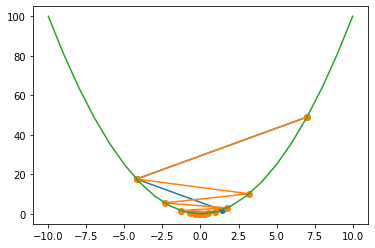

In [ ]:
x , y = gradient_descent_momentum(gradient=lambda v: 2 * v, start=7.0, learn_rate=0.8, gamma = 0.1)
x_nest, y_nest = gradient_descent_nesterov(gradient=lambda v: 2 * v, start=7.0, learn_rate=0.8, gamma = 0.1)
plt.plot(y,np.power(y,2), marker="o")
plt.plot(y_nest,np.power(y_nest,2), marker="o")
x1 = np.arange(-10,11)
plt.plot(x1 ,np.power(x1 ,2))

In [ ]:
# # example of plotting a gradient descent search on a one-dimensional function

 
# # objective function
# def objective(x):
# 	return x**2.0
 
# # derivative of objective function
# def derivative(x):
# 	return x * 2.0
 
# # gradient descent algorithm
# def gradient_descent(objective, derivative, bounds, n_iter, step_size):
# 	# track all solutions
# 	solutions, scores = list(), list()
# 	# generate an initial point
# 	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# 	# run the gradient descent
# 	for i in range(n_iter):
# 		# calculate gradient
# 		gradient = derivative(solution)
# 		# take a step
# 		solution = solution - step_size * gradient
# 		# evaluate candidate point
# 		solution_eval = objective(solution)
# 		# store solution
# 		solutions.append(solution)
# 		scores.append(solution_eval)
# 		# report progress
# 		# print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
# 	return [solutions, scores]
 
# # seed the pseudo random number generator
# seed(4)
# # define range for input
# bounds = asarray([[-1.0, 1.0]])
# # define the total iterations
# n_iter = 30
# # define the step size
# step_size = 0.1
# # perform the gradient descent search
# solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# # sample input range uniformly at 0.1 increments
# inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# # compute targets
# results = objective(inputs)
# # create a line plot of input vs result
# pyplot.plot(inputs, results)
# # plot the solutions found
# pyplot.plot(solutions, scores, '.-', color='red')
# # show the plot
# pyplot.show()

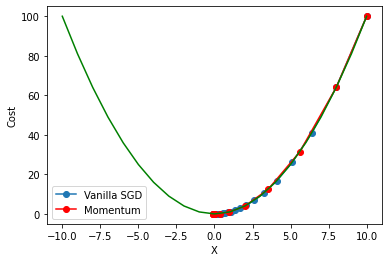

In [ ]:
x , y = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.1)
x_momen , y_momen = gradient_descent_momentum(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.1, gamma = 0.4)
plt.plot(y,np.power(y,2), marker="o", label = "Vanilla SGD")
plt.plot(y_momen,np.power(y_momen,2), marker="o", color= 'red', label = "Momentum")
x1 = np.arange(-10,11)
plt.plot(x1 ,np.power(x1 ,2),color= 'green')
plt.ylabel("Cost")
plt.xlabel("X")
plt.legend()

The above plot corresponds to the ideal case of where the optimization function is a smooth convex function without any pathologial curvatures. The red line traces how the values converge over each step of the iteration. The above corresponds to clean spherical curve in the 3D space. Here the gradients are same in both directions - x and y.

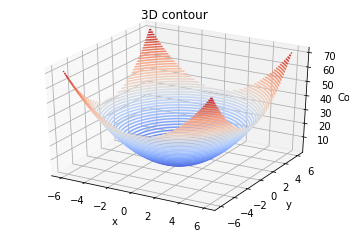

In [ ]:
def f(x, y):
   return (x ** 2) + (y ** 2)
	
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Cost')
ax.set_title('3D contour')
plt.show()

The above shows the 3D figure of the simple 1D loss surface that we have considered. Due to the smooth nature of the loss surface, most of the optimization functions perform decently in this space. To simulate cases where things aren't as smooth as the spherical surface, q]we will introduce a skew in the figure that cause the curvature to be much higher in one of the  direction compared to the other.

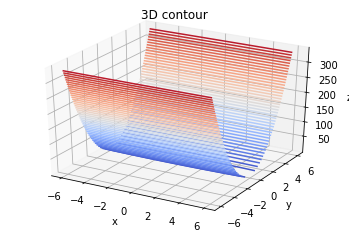

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x, y):
   return 1/16*(x ** 2) + 9.4*(y ** 2)
	
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

Now we have the surface $$\frac{1}{16}x^2 + 9 y^2$$.
Curvature is defined as the rate of increase in the height of the surface when taking a step in a particular direction. When you are in an area of high curvature it is better to take smaller steps in the direction otherwise the compounding effect of the slop of the curve might result in overshooting. And in the other case , we want to take smaller steps in lower curvature areas so that we move quicker through it making up for the lack of push from the slope. THe fundamental problem with Gradient Descent with regards to this is that GD performs the opposite. In areas of high curvature the gradient is large whereas in smaller curves the gradeint is small.[[1]](https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/readings/L08%20Optimization.pdf )

Here the curvature of the surface is much steeper in the y direction as compared to the x-direction. This is a surface which is called as a ravine.



A particular case where data such kind of ravines is when the data are of much different scales. For example in the case where the x values are 

| X1   | X2 |
|------|----|
|  114 | 1  |
| 398  | 2  |
| 200  | 4  |
| 500  | 0  |

The resulting cost function will have very skewed 
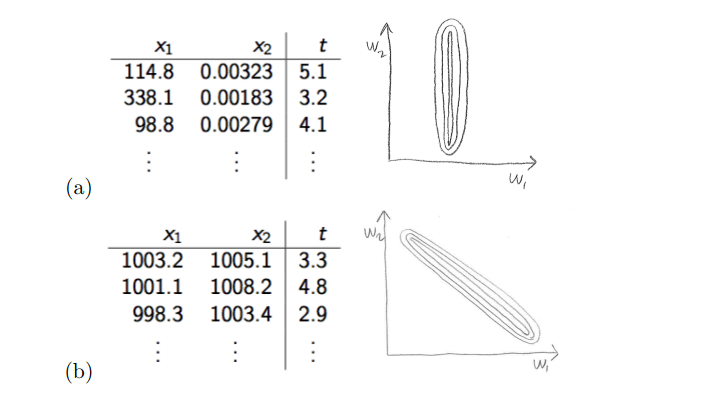



Even after nrormaliation there can still be cases where the loss surefaces may still have curvatures that are steep.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'lw'
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'lw'
  # This is added back by InteractiveShellApp.init_path()


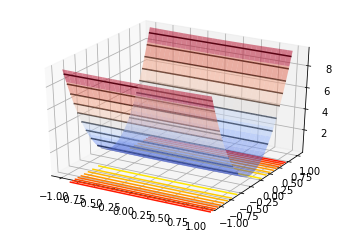

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = 1/16*(X ** 2) + 9.4*(Y ** 2)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, alpha=0.5)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


class LossSurface:
    """A loss surface with L(x, y) = a * x ^2 + b * y ^2.

    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

        N = 1000
        x_list = np.linspace(-2.5, 2.5, N)
        y_list = np.linspace(-0.5, 0.5, N)
        self.X, self.Y = np.meshgrid(x_list, y_list)
        self.Z = self.a * (self.X ** 2) + self.b * (self.Y ** 2)

    def plot(self):
        fig, ax = plt.subplots()
        cmap = cm.get_cmap('Blues_r')
        cp = ax.contour(self.X, self.Y, self.Z, 50, cmap=cmap)
        cbar = fig.colorbar(cp)
        cbar.set_label('loss')

        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-0.5, 0.5)

        ax.set_xlabel('x')
        ax.set_ylabel('y')

        return fig, ax


iteration: 1, w1: -2.37, w2: -0.17600000000000005, v1: -0.3, v2:3.7600000000000002, loss: 0.6422306500000001
iteration: 2, w1: -2.3403750000000003, w2: 0.15488000000000007, v1: -0.29625, v2:-3.308800000000001, loss: 0.5678201516490629
iteration: 3, w1: -2.3111203125000004, w2: -0.1362944000000001, v1: -0.29254687500000004, v2:2.9117440000000014, loss: 0.5084457553089154
iteration: 4, w1: -2.2822313085937505, w2: 0.11993907200000009, v1: -0.28889003906250005, v2:-2.5623347200000017, loss: 0.46075881544722574
iteration: 5, w1: -2.2537034172363284, w2: -0.1055463833600001, v1: -0.2852789135742188, v2:2.2548545536000018, loss: 0.4221650602834544
iteration: 6, w1: -2.2255321245208743, w2: 0.0928808173568001, v1: -0.28171292715454105, v2:-1.984272007168002, loss: 0.39065443191860205
iteration: 7, w1: -2.1977129729643634, w2: -0.08173511927398411, v1: -0.2781915155651093, v2:1.7461593663078419, loss: 0.36466931386467594
iteration: 8, w1: -2.170241560802309, w2: 0.07192690496110601, v1: -0.274

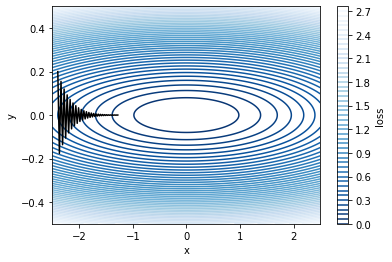

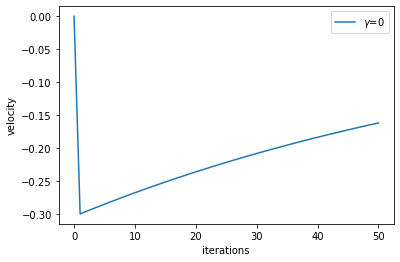

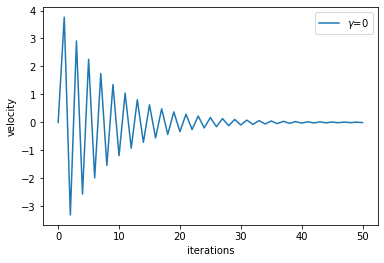

In [ ]:
import collections

import matplotlib.pyplot as plt


class Momentum:
    """ Momentum sgd update and plot weight trajectory.

    """
    def __init__(self, lr, iteration, beta, loss_surface):
        self.lr = lr
        self.iteration = iteration
        self.beta = beta
        self.a = loss_surface.a
        self.b = loss_surface.b

        self.w_1, self.w_2, self.v_1, self.v_2 = self.init_parameters()

    def run(self):
        w_1_curve = list()
        w_2_curve = list()
        v_1_curve = list()
        v_2_curve = list()

        w_1_curve.append(self.w_1)
        w_2_curve.append(self.w_2)
        v_1_curve.append(self.v_1)
        v_2_curve.append(self.v_2)

        for step in range(self.iteration):
            self.gd_update()
            loss = self.calculate_loss()

            w_1_curve.append(self.w_1)
            w_2_curve.append(self.w_2)
            v_1_curve.append(self.v_1)
            v_2_curve.append(self.v_2)

            print('iteration: {}, w1: {}, w2: {}, v1: {}, v2:{}, loss: {}'.format(
                  step+1, self.w_1, self.w_2, self.v_1, self.v_2, loss))

        return w_1_curve, w_2_curve, v_1_curve, v_2_curve

    def gd_update(self):
        self.v_1 = self.beta * self.v_1 + 2 * self.a * self.w_1
        self.w_1 -= self.lr * self.v_1

        self.v_2 = self.beta * self.v_2 + 2 * self.b * self.w_2
        self.w_2 -= self.lr * self.v_2

    def calculate_loss(self):
        loss = self.a * (self.w_1**2) + self.b * self.w_2**2

        return loss

    def save_plot(self, loss_surface_fig, loss_surface_ax, w_1_curve, w_2_curve):
        loss_surface_ax.plot(w_1_curve, w_2_curve, color="black")

        # fig_name = 'sgd_beta_{}_lr_{}_iter_{}_with_contour.png'.format(self.beta, self.lr, self.iteration)
        # # loss_surface_fig.savefig(fig_name)

        # print('{} saved.'.format(fig_name))

    @staticmethod
    def init_parameters():
        w_1 = -2.4
        w_2 = 0.2
        v_1 = 0
        v_2 = 0

        return w_1, w_2, v_1, v_2


def save_velocity_plot(name, v_curves, gamma = 0):
    fig, ax = plt.subplots()
    ax.plot(v_curves['beta_0.0'], label=r'$\gamma$='+str(gamma))
    # ax.plot(v_curves['beta_0.8'], label='beta=0.8')
    # ax.plot(v_curves['beta_0.9'], label='beta=0.9')
    ax.legend()

    ax.set_xlabel('iterations')
    ax.set_ylabel('velocity')

    fig_name = 'velocity_{}.png'.format(name)
    # fig.savefig(fig_name)

    # print('{} saved.'.format(fig_name))

lr = 0.1
iteration = 50

v_1_curves = collections.defaultdict(list)
v_2_curves = collections.defaultdict(list)

for beta in [0.0]:
    a = 1 / 16
    b = 9.4
    ls = LossSurface(a, b)
    ls_fig, ls_ax = ls.plot()

    demo = Momentum(lr=lr, iteration=iteration, beta=beta, loss_surface=ls)
    w_1_curve, w_2_curve, v_1_curve, v_2_curve = demo.run()
    demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)

    v_1_curves['beta_{}'.format(beta)] = v_1_curve
    v_2_curves['beta_{}'.format(beta)] = v_2_curve

save_velocity_plot('v_1', v_1_curves)
save_velocity_plot('v_2', v_2_curves)


In [ ]:
v_1_curve

[0,
 -0.3,
 -0.29625,
 -0.29254687500000004,
 -0.28889003906250005,
 -0.2852789135742188,
 -0.28171292715454105,
 -0.2781915155651093,
 -0.2747141216205454,
 -0.2712801951002886,
 -0.267889192661535,
 -0.2645405777532658,
 -0.26123382053134997,
 -0.2579683977747081,
 -0.25474379280252424,
 -0.25155949539249267,
 -0.2484150017000865,
 -0.24530981417883543,
 -0.2422434415016,
 -0.23921539848283,
 -0.2362252060017946,
 -0.23327239092677218,
 -0.23035648604018752,
 -0.22747702996468516,
 -0.2246335670901266,
 -0.22182564750150002,
 -0.21905282690773129,
 -0.21631466657138465,
 -0.21361073323924235,
 -0.21094059907375182,
 -0.2083038415853299,
 -0.2057000435655133,
 -0.2031287930209444,
 -0.2005896831081826,
 -0.1980823120693303,
 -0.19560628316846368,
 -0.19316120462885789,
 -0.19074668957099716,
 -0.1883623559513597,
 -0.1860078265019677,
 -0.1836827286706931,
 -0.18138669456230944,
 -0.17911936088028058,
 -0.17688036886927708,
 -0.17466936425841112,
 -0.17248599720518099,
 -0.17032992224

As we can see the vanilla SGD performs very poorly in this surface. This is becuase the gradient in the Y direction keeps changing every single iteration. Due to the steep curve in one of the directions, in particular the y-axis. The gradient is mostly used to push the value in the y-axis and making less progress in the other axis.

| Iteration | Y Velocity | X Velocity |
|-----------|------------|------------|
|  1        | 3.76       | -0.3       |
| 2         | -3.31      | -0.3       |
| 3         | 2.91       | -0.29      |
| 4         | -2.56      | -0.29      |
| 5         | 2.25       | -0.28      |
| 6         | -1.98      | -0.28      |

# Momentum
We now introduce the mometum alogrithm:
For each step we add a fraction of the previous value to the current value before updating. This gives it what can be considered as a short term memory of the previous values.
$$v_t = \gamma v_{t-1} - \alpha \nabla J(\theta^{k-1})$$
$$\theta^k = \theta^{k-1} + v_t $$
Here $v$ is called the velocity of the pararmeter.

In [ ]:
# # example of plotting gradient descent with momentum for a one-dimensional function
# from numpy import asarray
# from numpy import arange
# from numpy.random import rand
# from numpy.random import seed
# from matplotlib import pyplot
 
# # objective function
# def objective(x):
# 	return x**2.0
 
# # derivative of objective function
# def derivative(x):
# 	return x * 2.0
 
# # gradient descent algorithm
# def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
# 	# track all solutions
# 	solutions, scores = list(), list()
# 	# generate an initial point
# 	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# 	# keep track of the change
# 	change = 0.0
# 	# run the gradient descent
# 	for i in range(n_iter):
# 		# calculate gradient
# 		gradient = derivative(solution)
# 		# calculate update
# 		new_change = step_size * gradient + momentum * change
# 		# take a step
# 		solution = solution - new_change
# 		# save the change
# 		change = new_change
# 		# evaluate candidate point
# 		solution_eval = objective(solution)
# 		# store solution
# 		solutions.append(solution)
# 		scores.append(solution_eval)
# 		# report progress
# 		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
# 	return [solutions, scores]
 
# # seed the pseudo random number generator
# seed(4)
# # define range for input
# bounds = asarray([[-1.0, 1.0]])
# # define the total iterations
# n_iter = 30
# # define the step size
# step_size = 0.1
# # define momentum
# momentum = 0.3
# # perform the gradient descent search with momentum
# solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# # sample input range uniformly at 0.1 increments
# inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# # compute targets
# results = objective(inputs)
# # create a line plot of input vs result
# pyplot.plot(inputs, results)
# # plot the solutions found
# pyplot.plot(solutions, scores, '.-', color='red')
# # show the plot
# pyplot.show()

The effect of mometum in general is thatit speeds up the iteration process. As seen in the example above. We can see that the SGD converges in much fewer steps than the vanilla version.

iteration: 1, w1: -2.37, w2: -0.17600000000000005, v1: -0.3, v2:3.7600000000000002, loss: 0.6422306500000001
iteration: 2, w1: -2.3163750000000003, w2: -0.14592, v1: -0.53625, v2:-0.3008000000000006, loss: 0.5355004474490626
iteration: 3, w1: -2.2445203125, w2: 0.15247360000000004, v1: -0.7185468750000001, v2:-2.9839360000000004, loss: 0.5334000323279928
iteration: 4, w1: -2.15898005859375, w2: 0.10453811199999996, v1: -0.8554025390625002, v2:0.4793548800000007, loss: 0.3940499193267727
iteration: 5, w1: -2.063560604736328, w2: -0.13034192896000005, v1: -0.954194538574219, v2:2.3488004096, loss: 0.4258394214718637
iteration: 6, w1: -1.9614305340911864, w2: -0.07320313528319997, v1: -1.0213007064514161, v2:-0.5713879367680008, loss: 0.29082237949780776
iteration: 7, w1: -1.8552085958989333, w2: 0.11012979399065606, v1: -1.0622193819225312, v2:-1.83332929273856, loss: 0.32912100572316955
iteration: 8, w1: -1.747040937896394, w2: 0.04975212470730746, v1: -1.0816765800253916, v2:0.60377669

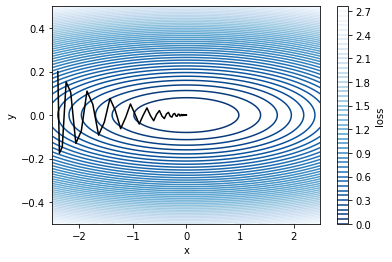

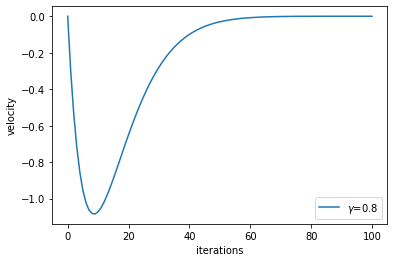

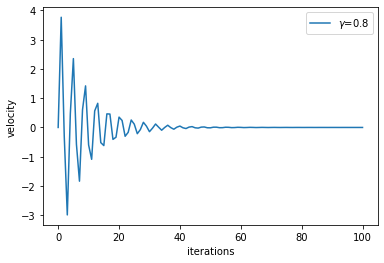

In [ ]:
a = 1 / 16
b = 9.4

ls = LossSurface(a, b)
ls_fig, ls_ax = ls.plot()

demo = Momentum(lr=0.1, iteration=100, beta=0.8, loss_surface=ls)
w_1_curve, w_2_curve, v_1_curve, v_2_curve = demo.run()
demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)

v_1_curves['beta_{}'.format(beta)] = v_1_curve
v_2_curves['beta_{}'.format(beta)] = v_2_curve

save_velocity_plot('v_1', v_1_curves, 0.8)
save_velocity_plot('v_2', v_2_curves, 0.8)

iteration: 1, w1: -2.16, w2: 0.03999999999999998, v1: -1.2, v2:0.8, loss: 1.1696000000000002
iteration: 2, w1: -1.7520000000000002, w2: -0.12000000000000005, v1: -2.04, v2:0.8, loss: 0.7961760000000002
iteration: 3, w1: -1.2504000000000002, w2: -0.15200000000000002, v1: -2.508, v2:0.15999999999999992, loss: 0.43708304000000014
iteration: 4, w1: -0.7240800000000002, w2: -0.055999999999999994, v1: -2.6316, v2:-0.48000000000000015, loss: 0.13734496160000007
iteration: 5, w1: -0.23061600000000015, w2: 0.06560000000000003, v1: -2.46732, v2:-0.6080000000000001, loss: 0.021902654864000025
iteration: 6, w1: 0.1872167999999999, w2: 0.11040000000000003, v1: -2.0891640000000002, v2:-0.22399999999999998, loss: 0.033138852550560004
iteration: 7, w1: 0.50276136, w2: 0.057920000000000006, v1: -1.5777228000000003, v2:0.2624000000000001, loss: 0.06990169907726242
iteration: 8, w1: 0.7049208720000001, w2: -0.030400000000000017, v1: -1.0107975600000003, v2:0.4416000000000001, loss: 0.12607667894531013
it

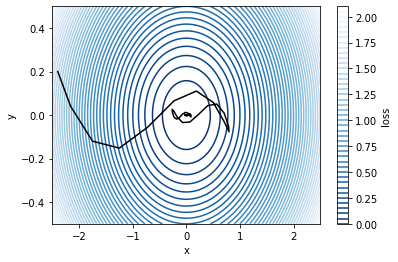

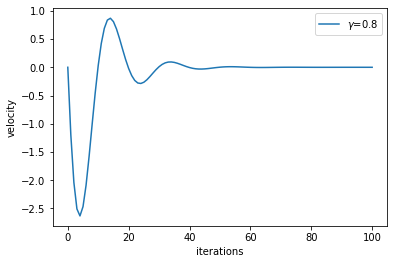

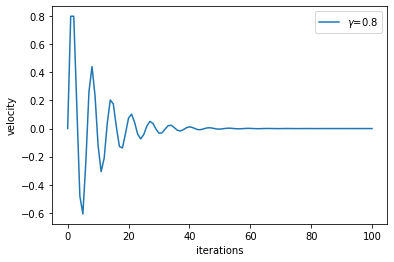

In [ ]:
a = 1 / 4
b = 2

# a = 1 / 16
# b = 9.4

ls = LossSurface(a, b)
ls_fig, ls_ax = ls.plot()

demo = Momentum(lr=0.2, iteration=100, beta=0.8, loss_surface=ls)
w_1_curve, w_2_curve, v_1_curve, v_2_curve = demo.run()
demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)

v_1_curves['beta_{}'.format(beta)] = v_1_curve
v_2_curves['beta_{}'.format(beta)] = v_2_curve

save_velocity_plot('v_1', v_1_curves,0.8)
save_velocity_plot('v_2', v_2_curves,0.8)

How the memtum works essentially is that the momentum term increases for dimensions where the gradients points towards the same direction and reduces the updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.
Because the gradient in the x direction always points to the positive x direction, the velocity can be accumulated. Effectively this means larger learning rate in the x direction so it can reach to lower loss for same number of iterations compare to vanilla gradient descent. The is also why momentum is said to be able to damp oscillation.
 Y due to the large slope has values that oscillate between the signs. Due to these oscillations the previous value is of opposite sign to the current velocity. When the velocity and the current update parameters are added together the update value reduces, thereby damping the oscialltions.

# Nesterov Accelerated Gradient
Nesterov Accelerated Gradient or NAG is a method that improves on the standard moementum.
$$v_t = \gamma v_{t-1} - \alpha \nabla J(\theta^{k-1} + \gamma v_{t-1})$$
$$\theta^k = \theta^{k-1} + v_t $$

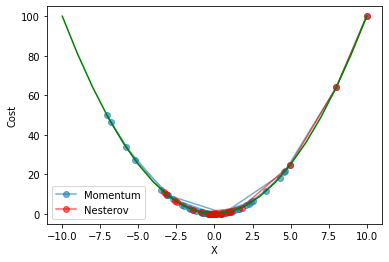

In [ ]:
x , y = gradient_descent_momentum(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.1, gamma = 0.9)
x_nest, y_nest = gradient_descent_nesterov(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.1, gamma = 0.9)
plt.plot(y,np.power(y,2), marker="o", label = "Momentum",alpha = 0.6)
plt.plot(y_nest,np.power(y_nest,2), marker="o", color= 'red', label = "Nesterov", alpha = 0.6)
x1 = np.arange(-10,11)
plt.plot(x1 ,np.power(x1 ,2),color= 'green')
plt.ylabel("Cost")
plt.xlabel("X")
plt.legend()

# x , y = gradient_descent(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.1)
# x_momen , y_momen = gradient_descent_momentum(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.1, gamma = 0.4)
# plt.plot(y,np.power(y,2), marker="o", label = "Vanilla SGD")
# plt.plot(y_momen,np.power(y_momen,2), marker="o", color= 'red', label = "Momentum")
# x1 = np.arange(-10,11)
# plt.plot(x1 ,np.power(x1 ,2),color= 'green')
# plt.ylabel("Cost")
# plt.xlabel("X")
# plt.legend()


Both the lines are plotted using $\alpha= 0.6$ and $\gamma = 0.8$
Here we can see that the standard momentum faces an issue where the gradient overshoots and fails to converge fast enough. 
We can see that the Nesterov method converges quicker as Nesterov uses the value of update of the next time step to calculate the gradeint required for the crrent time step.
If the momentum term points in the wrong direction or overshoots, the gradient can still "go back" and correct it in the same update step.

In [ ]:
class NAG:
    """ Momentum sgd update and plot weight trajectory.

    """
    def __init__(self, lr, iteration, beta, loss_surface):
        self.lr = lr
        self.iteration = iteration
        self.beta = beta
        self.a = loss_surface.a
        self.b = loss_surface.b

        self.w_1, self.w_2, self.v_1, self.v_2 = self.init_parameters()

    def run(self):
        w_1_curve = list()
        w_2_curve = list()
        v_1_curve = list()
        v_2_curve = list()

        w_1_curve.append(self.w_1)
        w_2_curve.append(self.w_2)
        v_1_curve.append(self.v_1)
        v_2_curve.append(self.v_2)

        for step in range(self.iteration):
            self.gd_update()
            loss = self.calculate_loss()

            w_1_curve.append(self.w_1)
            w_2_curve.append(self.w_2)
            v_1_curve.append(self.v_1)
            v_2_curve.append(self.v_2)

            print('iteration: {}, w1: {}, w2: {}, v1: {}, v2:{}, loss: {}'.format(
                  step+1, self.w_1, self.w_2, self.v_1, self.v_2, loss))

        return w_1_curve, w_2_curve, v_1_curve, v_2_curve

    def gd_update(self):
        prev_w1 = self.w_1
        self.w_1 = self.w_1 + self.beta * self.v_1
        self.v_1 = self.beta * self.v_1 - self.lr * 2 * self.a * self.w_1
        self.w_1 = prev_w1

        prev_w2 = self.w_2
        self.w_2 = self.w_2 + self.beta * self.v_2
        self.v_2 = self.beta * self.v_2 - self.lr * 2 * self.b * self.w_2
        self.w_2 = prev_w2

        self.w_1 += self.v_1
        self.w_2 += self.v_2

    def calculate_loss(self):
        loss = self.a * (self.w_1**2) + self.b * self.w_2**2

        return loss

    def save_plot(self, loss_surface_fig, loss_surface_ax, w_1_curve, w_2_curve):
        loss_surface_ax.plot(w_1_curve, w_2_curve, color="black")

        # fig_name = 'sgd_beta_{}_lr_{}_iter_{}_with_contour.png'.format(self.beta, self.lr, self.iteration)
        # # loss_surface_fig.savefig(fig_name)

        # print('{} saved.'.format(fig_name))

    @staticmethod
    def init_parameters():
        w_1 = -2.4
        w_2 = 0.2
        v_1 = 0
        v_2 = 0

        return w_1, w_2, v_1, v_2


iteration: 1, w1: -2.28, w2: 0.12, v1: 0.12, v2:-0.08000000000000002, loss: 1.3283999999999998
iteration: 2, w1: -2.0747999999999998, w2: 0.03359999999999999, v1: 0.2052, v2:-0.0864, loss: 1.0784566799999997
iteration: 3, w1: -1.8151079999999997, w2: -0.021312000000000005, v1: 0.259692, v2:-0.054911999999999996, loss: 0.8245626656039997
iteration: 4, w1: -1.5269866799999998, w2: -0.03914496, v1: 0.28812131999999996, v2:-0.017832959999999995, loss: 0.5859867360111586
iteration: 5, w1: -1.2316651427999998, w2: -0.0320467968, v1: 0.2953215372, v2:0.007098163200000002, loss: 0.381303750367417
iteration: 6, w1: -0.9456375173879998, w2: -0.015820959743999996, v1: 0.286027625412, v2:0.016225837056000003, loss: 0.22405818410737746
iteration: 7, w1: -0.6809746462054798, w2: -0.0017041740595199958, v1: 0.26466287118252, v2:0.01411678568448, loss: 0.11593742561211987
iteration: 8, w1: -0.4457821317964905, w2: 0.005753552692838402, v1: 0.23519251440898922, v2:0.007457726752358398, loss: 0.04974663

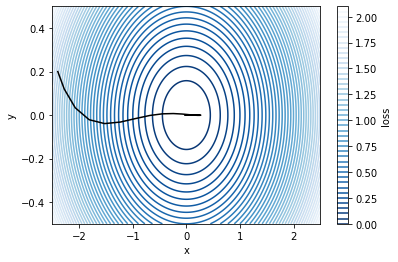

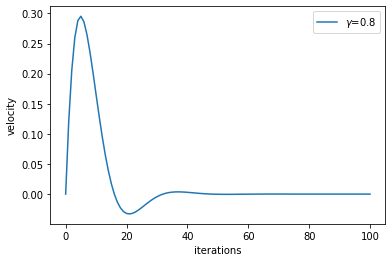

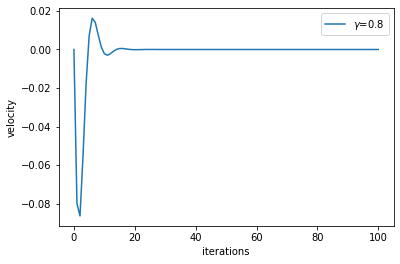

In [ ]:
a = 1/4
b = 2

# a = 1 / 16
# b = 9.4
ls = LossSurface(a, b)
ls_fig, ls_ax = ls.plot()

demo = NAG(lr=0.1, iteration=100, beta=0.8, loss_surface=ls)
w_1_curve, w_2_curve, v_1_curve, v_2_curve = demo.run()
demo.save_plot(ls_fig, ls_ax, w_1_curve, w_2_curve)

v_1_curves['beta_{}'.format(beta)] = v_1_curve
v_2_curves['beta_{}'.format(beta)] = v_2_curve

save_velocity_plot('v_1', v_1_curves,0.8)
save_velocity_plot('v_2', v_2_curves,0.8)

The Nesterov Accelerated Gradient method consists of a gradient descent step, followed by something that looks a lot like a momentum term, but isn’t exactly the same as that found in classical momentum. I’ll call it a “momentum stage” here. It’s important to note that the parameters being minimized by NAG are given the symbol y by Sutskever, not θ. You’ll see that θ is the symbol for the parameters after they’ve been updated by the gradient descent stage, but before the momentum stage.

Here’s the gradient descent stage:
$$\theta_t = y_t - \varepsilon_t \nabla f\left(y_t\right)$$
And here’s the momentum stage:
$$y_{t+1} = \theta_t + \mu_t\left(\theta_t - \theta_{t-1} \right)$$
That concludes one iteration of NAG. The hard part is actually finding the correct learning rate and momentum value in order to get the convergence guarantees that make the method attractive, but that needn’t concern us. Sutskever in his thesis suggests manual tuning to get an optimal result (at least for deep learning applications) so we are in heuristic territory here anyway.

The key idea behind the Sutskever momentum derivation is to shift the perspective about which of the parameters we want as the result of the iteration, from y to θ. Rather than having the optimization iterations proceed as “gradient descent, momentum (end of iteration 1), gradient descent, momentum (end of iteration 2), gradient descent etc.” move the boundary of where the iterations end by a half-iteration to get “momentum, gradient descent (end of iteration 1), momentum, gradient descent (end of iteration 2) etc.”. This leaves a phantom gradient descent step that used to be first stage of the first iteration, now floating in the nether regions of iteration zero, but you can just pretend that the starting position is the result of gradient descent from some other arbitrary starting position.

The Sutskever derivation then proceeds as follows. First, rewrite the momentum stage in terms of yt:

$$y_t = \theta_{t-1} + \mu_{t-1}\left(\theta_{t-1} - \theta_{t-2} \right)$$

Then note that the term in parentheses is just the definition of the velocity vector, so we can write:

$$y_t = \theta_{t-1} + \mu_{t-1}v_{t-1}$$

We now substitute this expression for yt into the gradient descent stage:

$$\theta_t = \theta_{t-1} + \mu_{t-1}v_{t-1} - \varepsilon_t \nabla f\left(y_t\right)$$
and replace yt with an expression in terms of θt:

$$\theta_t = \theta_{t-1} + \mu_{t-1}v_{t-1} - \varepsilon_t \nabla f\left(\theta_{t-1} + \mu_{t-1}v_{t-1}\right)$$

At this point, the expression differs from that given by Sutskever in one detail: the learning rate associated with the gradient descent is currently written as εt. But remember that we have now moved the boundaries of the iteration: the gradient descent that would have been the first stage of iteration t+1 is now the second stage of iteration t. So the above expression is more correctly written as:

$$\theta_t = \theta_{t-1} + \mu_{t-1}v_{t-1} - \varepsilon_{t-1} \nabla f\left(\theta_{t-1} + \mu_{t-1}v_{t-1}\right)$$
just as given by Sutskever. And therefore the expression for the parameter update is trivially:

$$\theta_{t+1} = \theta_t + \mu_t v_t - \varepsilon_t \nabla f\left(\theta_t + \mu_t v_t\right)$$

with the velocity vector defined as:

$$v_{t+1} = \mu_t v_t - \varepsilon_t \nabla f\left(\theta_t + \mu_t v_t\right)$$

This looks just like the classical momentum update, except that the gradient is calculated after the momentum update. Hence, one can do NAG by simply reversing the order in which the update is usually carried out: do the momentum stage first, update the parameters, and then do the gradient descent part.

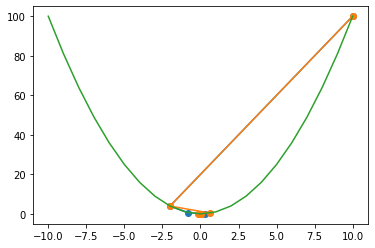

In [ ]:
x , y = gradient_descent_momentum(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.6, gamma = 0.1)
x_nest, y_nest = gradient_descent_nesterov(gradient=lambda v: 2 * v, start=10.0, learn_rate=0.6, gamma = 0.1)
plt.plot(y,np.power(y,2), marker="o")
plt.plot(y_nest,np.power(y_nest,2), marker="o")
x1 = np.arange(-10,11)
plt.plot(x1 ,np.power(x1 ,2))

According to Sutskever et al. Theorem 2.1. it is shown that for smaller values of $\gamma$. There isn't much of a difference between NAG and Classical Momentum.